## Project Purpose ##
The purpose of this project is to classify Iris data using the CNN model and report the performance of a model. 

In [1]:
# Import necessary libraries 
from sklearn import datasets # importing iris datset
import tensorflow as tf # library used to build neural networks 
from tensorflow.keras.layers import Conv1D # for building neural layers 
import matplotlib.pyplot as plt # for visualization 
from sklearn.model_selection import train_test_split # splitting datsetset for evauating the performance of a model
import numpy as np # for numerical operations

In [3]:

# Load and split the Iris dataset 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape data for Conv1D input [batch_size, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

Epoch 1/15
1/6 [====>.........................] - ETA: 0s - loss: 1.1848 - accuracy: 0.2500

2025-03-13 13:40:28.752853: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 14ms/step - loss: 1.1268 - accuracy: 0.3191 - val_loss: 1.0199 - val_accuracy: 0.4545
Epoch 2/15
6/6 [==============================] - 0s 2ms/step - loss: 1.0534 - accuracy: 0.3404 - val_loss: 0.9898 - val_accuracy: 0.4545
Epoch 3/15
6/6 [==============================] - 0s 2ms/step - loss: 1.0026 - accuracy: 0.3830 - val_loss: 0.9483 - val_accuracy: 0.5455
Epoch 4/15
6/6 [==============================] - 0s 2ms/step - loss: 0.9534 - accuracy: 0.5851 - val_loss: 0.9018 - val_accuracy: 0.6364
Epoch 5/15
6/6 [==============================] - 0s 2ms/step - loss: 0.9005 - accuracy: 0.6489 - val_loss: 0.8598 - val_accuracy: 0.6364
Epoch 6/15
6/6 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.7234 - val_loss: 0.8183 - val_accuracy: 0.9091
Epoch 7/15
6/6 [==============================] - 0s 2ms/step - loss: 0.7986 - accuracy: 0.9255 - val_loss: 0.7584 - val_accuracy: 0.9091
Epoch 8/15
6/6 [============================

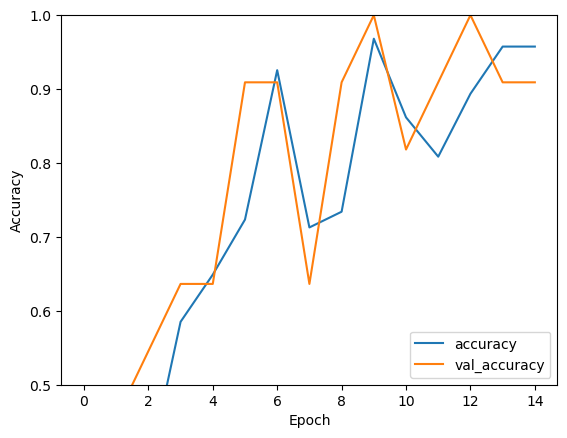

2/2 - 0s - loss: 0.4205 - accuracy: 0.9778 - 8ms/epoch - 4ms/step


In [5]:
# Build CNN-based model
model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(4, 1)),
        tf.keras.layers.GlobalMaxPooling1D(),  # or Flatten()
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
# measure the success 
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# retain history of training epochs
history = model.fit(X_train, y_train, batch_size = 16, epochs = 15, validation_split = 0.1)

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("test accuracy:", score[1])

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
plt.show()

# Evaluate the model 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)